In [2]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import os

In [48]:
dat = sio.loadmat('/content/drive/MyDrive/mat2mne.mat')

In [49]:
dat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'mrk', 'cnt', 'nfo'])

In [50]:
dat['__header__']

b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Jul  7 18:53:37 2008'

In [52]:
sfreq= dat['nfo']['fs'][0][0][0][0]
EEGdata= dat['cnt'].T
chan_names= [s[0] for s in dat['nfo']['clab'][0][0][0]]

nchannels,nsamples=EEGdata.shape

event_onsets= dat['mrk'][0][0][0]
event_codes= dat['mrk'][0][0][1]

labels=np.zeros((1,nsamples),dtype=int)
labels[0,event_onsets]=event_codes

cl_lab=[s[0] for s in dat['nfo']['classes'][0][0][0]]
cl1=cl_lab[0]
cl2=cl_lab[1]

xpos=dat['nfo']['xpos']
ypos=dat['nfo']['ypos']

nclasses=len(cl_lab)
nevents=len(event_onsets)




In [53]:
print(chan_names)

['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'PO1', 'PO2', 'O1', 'O2']


In [54]:
#Dictionary to store the trials
trial={}
#time window to extract each trial is .5 to .25 seconds
win=np.arange(int(.5*sfreq), int(2.5*sfreq))

#length  of the time window
nsamples=len(win)

#Loop over the classes(right,foot)
for cl, codes in zip(cl_lab, np.unique(event_codes)):

  #Extract the onsets for the class
  cl_onsets = event_onsets[event_codes==codes]

  #Allocate memory for the trials
  trial[cl]=np.zeros((nchannels,nsamples, len(cl_onsets)))

  #Extract each trial
  for i, onset in enumerate(cl_onsets):
    trial[cl][:,:,i]=EEGdata[:,win+onset]





In [55]:
#Rearranging the demensions of trial
left_hand= np.rollaxis(trial[cl1],2,0)
right_hand= np.rollaxis(trial[cl2],2,0)

In [77]:
data=np.concatenate((left_hand,right_hand),)

In [57]:
print(left_hand)

[[[ 885.  909.  918. ...  916.  922.  939.]
  [ 674.  732.  708. ...  636.  638.  610.]
  [1312. 1303. 1334. ... 1207. 1240. 1259.]
  ...
  [1016.  987.  971. ...  688.  764.  770.]
  [1312. 1224. 1188. ...  898.  998. 1090.]
  [ 787.  789.  794. ...  458.  597.  631.]]

 [[ 799.  839.  852. ...  880.  903.  933.]
  [ 279.  352.  415. ...  388.  436.  468.]
  [1153. 1175. 1178. ... 1257. 1279. 1296.]
  ...
  [ 676.  697.  759. ...  701.  739.  821.]
  [ 957.  964. 1061. ... 1086. 1122. 1129.]
  [ 478.  475.  576. ...  539.  588.  652.]]

 [[ 896.  885.  865. ...  940.  960. 1008.]
  [ 359.  355.  359. ...  266.  294.  313.]
  [1288. 1240. 1197. ... 1185. 1191. 1236.]
  ...
  [ 873.  806.  681. ...  694.  629.  573.]
  [1211. 1151. 1032. ... 1061.  947.  850.]
  [ 680.  634.  532. ...  548.  497.  386.]]

 ...

 [[ 689.  647.  649. ...  840.  804.  772.]
  [ 613.  586.  598. ...  735.  749.  717.]
  [1319. 1283. 1292. ... 1508. 1438. 1388.]
  ...
  [ 614.  602.  737. ...  981.  832.  74

In [58]:
#Creating labels
Y= np.concatenate([-np.ones(left_hand.shape[0]),np.ones(right_hand.shape[0])])

In [59]:
!pip install mne

In [60]:
import mne

In [61]:
n_channels=59

#initializing a mne
info=mne.create_info(
    ch_names=chan_names,
    sfreq=sfreq,
    ch_types=['eeg']*n_channels
)
print(info)

<Info | 7 non-empty values
 bads: []
 ch_names: AF3, AF4, F5, F3, F1, Fz, F2, F4, F6, FC5, FC3, FC1, FCz, FC2, ...
 chs: 59 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: unspecified
 nchan: 59
 projs: []
 sfreq: 100.0 Hz
>


In [64]:
#digitized electrode position
xpos=dat['nfo']['xpos'][0][0]
ypos=dat['nfo']['ypos'][0][0]


In [65]:
layout_pos=np.concatenate([xpos,ypos],axis=1)
layout_pos

array([[-0.20109028,  0.68656518],
       [ 0.20109028,  0.68656518],
       [-0.48547489,  0.52547424],
       [-0.32894737,  0.46520183],
       [-0.16535231,  0.43208641],
       [ 0.        ,  0.421549  ],
       [ 0.16535231,  0.43208641],
       [ 0.32894737,  0.46520183],
       [ 0.48547489,  0.52547424],
       [-0.60591541,  0.27165704],
       [-0.39919579,  0.23384348],
       [-0.19765935,  0.21394494],
       [ 0.        ,  0.20773757],
       [ 0.19765935,  0.21394494],
       [ 0.39919579,  0.23384348],
       [ 0.60591541,  0.27165704],
       [-0.74834683,  0.15177169],
       [-0.52472976,  0.12553103],
       [-0.30963911,  0.11086096],
       [-0.10226303,  0.10426648],
       [ 0.10226303,  0.10426648],
       [ 0.30963911,  0.11086096],
       [ 0.52472976,  0.12553103],
       [ 0.74834683,  0.15177169],
       [-0.87719298,  0.        ],
       [-0.64569058,  0.        ],
       [-0.421549  ,  0.        ],
       [-0.20773757,  0.        ],
       [ 0.        ,

In [90]:
layout=mne.channels.generate_2d_layout(
    xy=layout_pos,
    ch_names=chan_names,
    name='EEG custom layout',
)

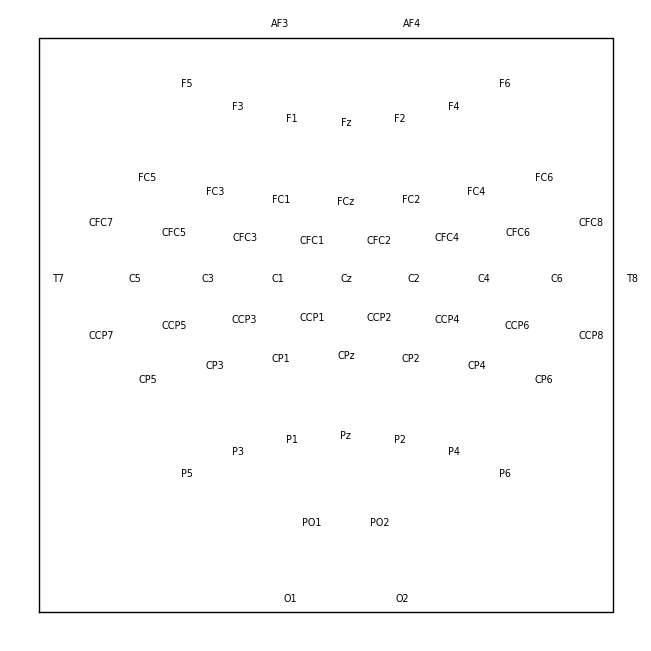

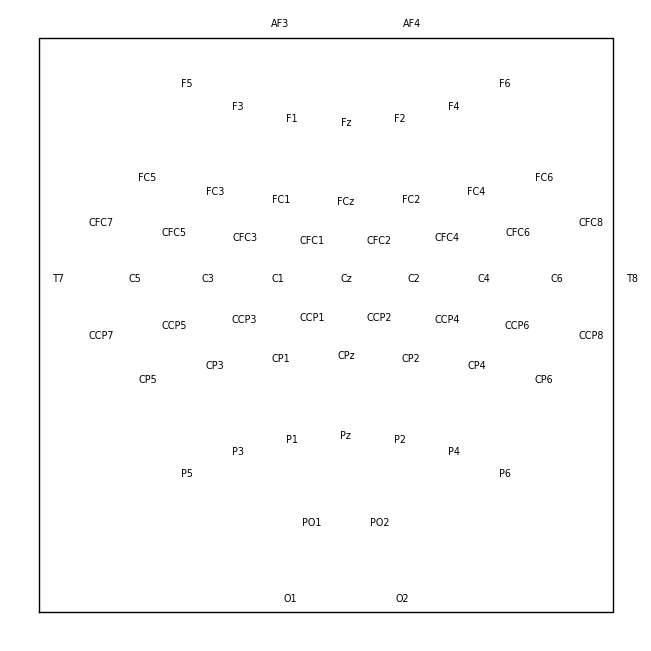

In [91]:
layout.plot()

In [72]:
event_id=dict(left=-1, right=1)
#Create an event matrix:events with alternate event codes
eventlength=Y.shape[0]
ev= [i*sfreq*3 for i in range(eventlength)]
events=np.column_stack((np.array(ev), np.zeros(eventlength, dtype=int),np.array(Y, dtype=int)))


In [92]:
events

array([[    0,     0,    -1],
       [  300,     0,    -1],
       [  600,     0,    -1],
       [  900,     0,    -1],
       [ 1200,     0,    -1],
       [ 1500,     0,    -1],
       [ 1800,     0,    -1],
       [ 2100,     0,    -1],
       [ 2400,     0,    -1],
       [ 2700,     0,    -1],
       [ 3000,     0,    -1],
       [ 3300,     0,    -1],
       [ 3600,     0,    -1],
       [ 3900,     0,    -1],
       [ 4200,     0,    -1],
       [ 4500,     0,    -1],
       [ 4800,     0,    -1],
       [ 5100,     0,    -1],
       [ 5400,     0,    -1],
       [ 5700,     0,    -1],
       [ 6000,     0,    -1],
       [ 6300,     0,    -1],
       [ 6600,     0,    -1],
       [ 6900,     0,    -1],
       [ 7200,     0,    -1],
       [ 7500,     0,    -1],
       [ 7800,     0,    -1],
       [ 8100,     0,    -1],
       [ 8400,     0,    -1],
       [ 8700,     0,    -1],
       [ 9000,     0,    -1],
       [ 9300,     0,    -1],
       [ 9600,     0,    -1],
       [ 9

In [93]:
tmin=.5
epochs=mne.EpochsArray(data, info, events, tmin, event_id)

Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated


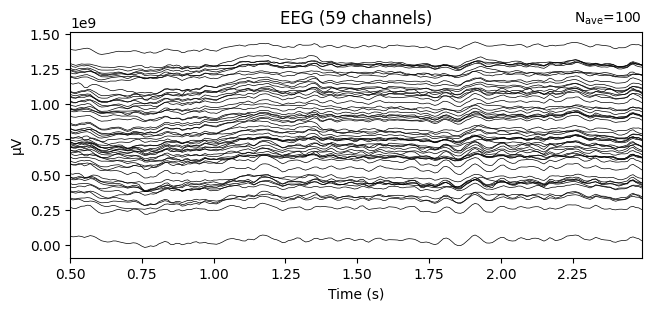

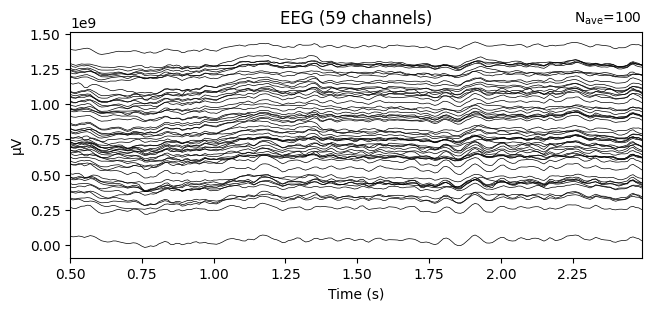

In [94]:
epochs['left'].average().plot()

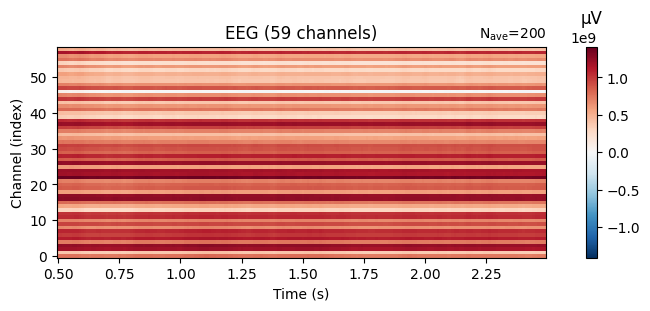

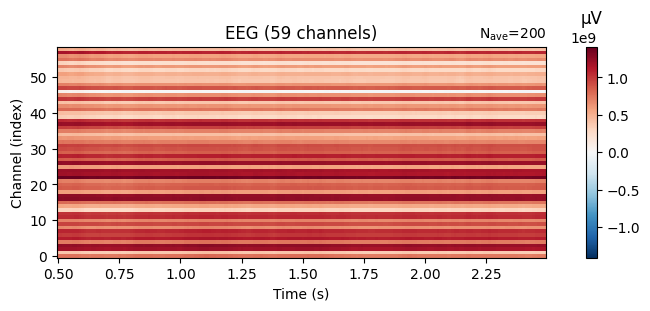

In [95]:
epochs.average().plot_image()

In [96]:
epochs.filter(l_freq=8, h_freq=32)

Setting up band-pass filter from 8 - 32 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 32.00 Hz
- Upper transition bandwidth: 8.00 Hz (-6 dB cutoff frequency: 36.00 Hz)
- Filter length: 165 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 3041 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 3527 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed:    1.6s
[Parallel(n_job

Number of events,200
Events,left: 100right: 100
Time range,0.500 – 2.490 s
Baseline,off


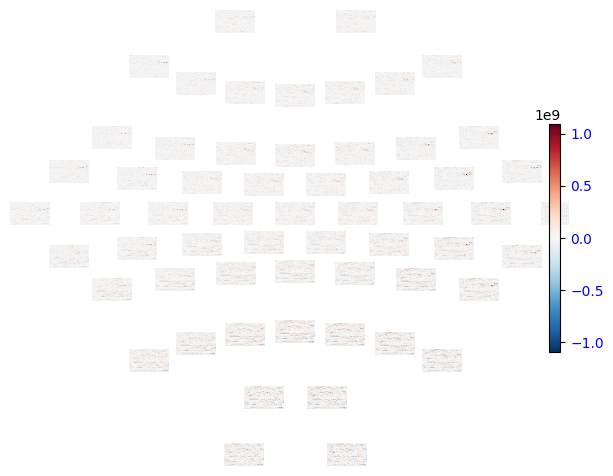

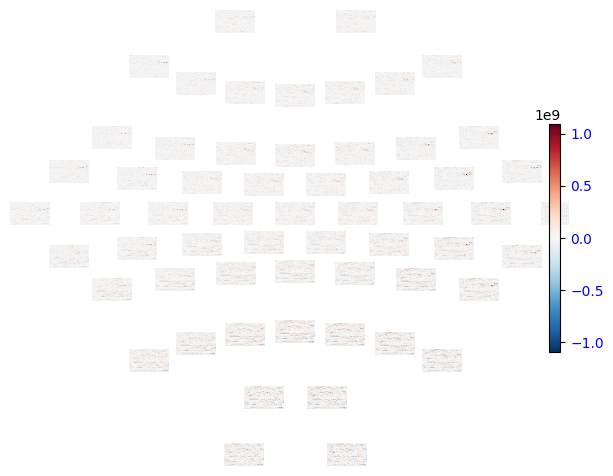

In [97]:
epochs.plot_topo_image(layout=layout, fig_facecolor='w', font_color='b')

Setting up band-pass filter from 8 - 32 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 32.00 Hz
- Upper transition bandwidth: 8.00 Hz (-6 dB cutoff frequency: 36.00 Hz)
- Filter length: 165 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 3041 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 3527 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed:    1.0s
[Parallel(n_job

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs...


<ipython-input-98-a53da84c3649>:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  epochs.filter(l_freq=8, h_freq=32).plot_psd()
<ipython-input-98-a53da84c3649>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs.filter(l_freq=8, h_freq=32).plot_psd()


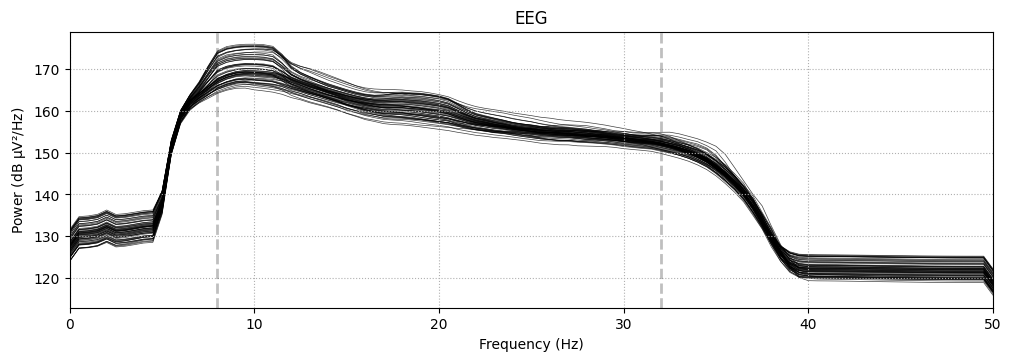

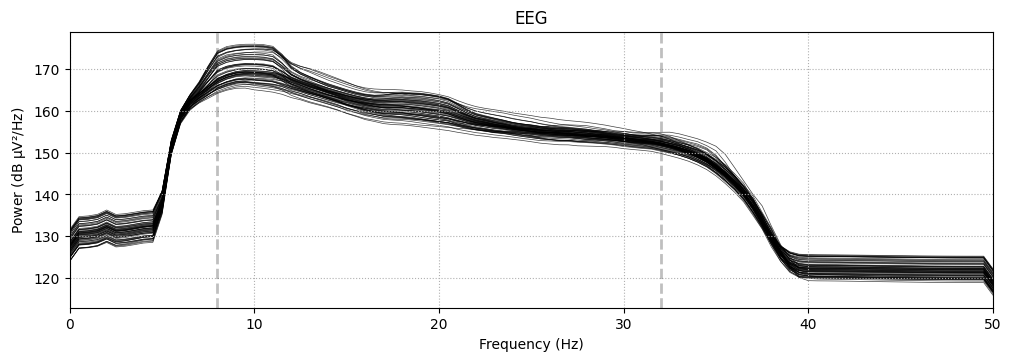

In [98]:
epochs.filter(l_freq=8, h_freq=32).plot_psd()